In [265]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,7) # Adjust the configuration plot  we will create

pd.options.mode.chained_assignment = None



In [158]:
# read in  the data 
df=pd.read_csv("movies.csv",)

In [159]:
# lets look at the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [160]:
# number of row and columns
df.shape

(7668, 15)

In [161]:
# name of columns
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [162]:
# infomation about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [163]:
# let see any missing data
df.isnull().sum()


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [165]:
budget_mean=round(df["budget"].mean())

In [166]:
gross_mean=round(df["gross"].mean())

    

In [167]:
gross_mean




78500541

In [168]:
# dataframe where gross is null
df[df["gross"].isnull()]

name rating      genre  year  \
27       Raise the Titanic     PG     Action  1980   
41          Breaker Morant     PG      Drama  1980   
47          The Boogey Man      R     Horror  1980   
49      Lion of the Desert     PG  Biography  1980   
52    Can't Stop the Music     PG  Biography  1980   
...                    ...    ...        ...   ...   
7663          More to Life    NaN      Drama  2020   
7664           Dream Round    NaN     Comedy  2020   
7665         Saving Mbango    NaN      Drama  2020   
7666          It's Just Us    NaN      Drama  2020   
7667             Tee em el    NaN     Horror  2020   

                              released  score    votes         director  \
27      August 1, 1980 (United States)    5.0   4100.0    Jerry Jameson   
41            July 3, 1980 (Australia)    7.9  13000.0  Bruce Beresford   
47    November 7, 1980 (United States)    4.6   3900.0      Ulli Lommel   
49                May 16, 1981 (Japan)    8.3  15000.0  Moustapha Akkad   
52       June 20, 1980 (United States)    4.2   3700.0     Nancy Walker   
...                                ...    ...      ...              ...   
7663  October 23, 2020 (United States)    3.1     18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7     36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7     29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN      NaN    James Randall   
7667   August 19, 2020 (United States)    5.7      7.0     Pereko Mosia   

              writer              star         country      budget  gross  \
27      Adam Kennedy     Jason Robards  United Kingdom  36000000.0    NaN   
41    Jonathan Hardy   Edward Woodward       Australia         NaN    NaN   
47       Ulli Lommel      Suzanna Love   United States    300000.0    NaN   
49      David Butler     Anthony Quinn           Libya  35000000.0    NaN   
52    Bronte Woodard       Ray Simpson   United States  20000000.0    NaN   
...              ...               ...             ...         ...    ...   
7663   Joseph Ebanks      Shannon Bond   United States      7000.0    NaN   
7664     Lisa Huston  Michael Saquella   United States         NaN    NaN   
7665    Lynno Lovert      Onyama Laura   United States     58750.0    NaN   
7666   James Randall     Christina Roz   United States     15000.0    NaN   
7667    Pereko Mosia  Siyabonga Mabaso    South Africa         NaN    NaN   

                                    company  runtime  
27                                ITC Films    115.0  
41    The South Australian Film Corporation    107.0  
47             The Jerry Gross Organization     82.0  
49         Falcon International Productions    173.0  
52                                EMI Films    124.0  
...                                     ...      ...  
7663                                    NaN     90.0  
7664              Cactus Blue Entertainment     90.0  
7665                       Embi Productions      NaN  
7666                                    NaN    120.0  
7667                            PK 65 Films    102.0  

[189 rows x 15 columns]

In [169]:
# dataframe where budgetb is null
df[df["budget"].isnull()]

name     rating   genre  year  \
16                Fame          R   Drama  1980   
19          Stir Crazy          R  Comedy  1980   
24        Urban Cowboy         PG   Drama  1980   
25      Altered States          R  Horror  1980   
26     Little Darlings          R  Comedy  1980   
...                ...        ...     ...   ...   
7657              Leap        NaN   Drama  2020   
7659         I Am Fear  Not Rated  Horror  2020   
7660  Aloha Surf Hotel        NaN  Comedy  2020   
7664       Dream Round        NaN  Comedy  2020   
7667         Tee em el        NaN  Horror  2020   

                                released  score    votes            director  \
16          May 16, 1980 (United States)    6.6  21000.0         Alan Parker   
19     December 12, 1980 (United States)    6.8  26000.0      Sidney Poitier   
24          June 6, 1980 (United States)    6.4  14000.0       James Bridges   
25     December 25, 1980 (United States)    6.9  33000.0         Ken Russell   
26        March 21, 1980 (United States)    6.5   5100.0         Ron Maxwell   
...                                  ...    ...      ...                 ...   
7657  September 25, 2020 (United States)    6.7    903.0   Peter Ho-Sun Chan   
7659       March 3, 2020 (United States)    3.4    447.0       Kevin Shulman   
7660    November 5, 2020 (United States)    7.1     14.0  Stefan C. Schaefer   
7664    February 7, 2020 (United States)    4.7     36.0        Dusty Dukatz   
7667     August 19, 2020 (United States)    5.7      7.0        Pereko Mosia   

                  writer              star        country  budget  \
16      Christopher Gore       Eddie Barth  United States     NaN   
19    Bruce Jay Friedman       Gene Wilder  United States     NaN   
24          Aaron Latham     John Travolta  United States     NaN   
25       Paddy Chayefsky      William Hurt  United States     NaN   
26             Kimi Peck      Tatum O'Neal  United States     NaN   
...                  ...               ...            ...     ...   
7657            Ji Zhang           Gong Li          China     NaN   
7659       Kevin Shulman    Kristina Klebe  United States     NaN   
7660  Stefan C. Schaefer       Augie Tulba  United States     NaN   
7664         Lisa Huston  Michael Saquella  United States     NaN   
7667        Pereko Mosia  Siyabonga Mabaso   South Africa     NaN   

            gross                                  company  runtime  
16     21202829.0                Metro-Goldwyn-Mayer (MGM)    134.0  
19    101300000.0                        Columbia Pictures    111.0  
24     46918287.0                       Paramount Pictures    132.0  
25     19853892.0                             Warner Bros.    102.0  
26     34326249.0  Stephen Friedman/Kings Road Productions     96.0  
...           ...                                      ...      ...  
7657   25818882.0                                      NaN    135.0  
7659      13266.0                            Roxwell Films     87.0  
7660          NaN                      Abominable Pictures     90.0  
7664          NaN                Cactus Blue Entertainment     90.0  
7667          NaN                              PK 65 Films    102.0  

[2171 rows x 15 columns]

In [170]:
# fullfill the missing data of gross amd budget with mean
df["gross"]=df["gross"].fillna(gross_mean)
df["budget"]=df["budget"].fillna(budget_mean)


In [171]:
df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [172]:
df[df["country"].isnull()]

name rating   genre  year  \
5728  Saw: The Final Chapter      R   Crime  2010   
5730             The Wolfman      R   Drama  2010   
7615            Clinton Road    NaN  Horror  2019   

                           released  score     votes        director  \
5728                            NaN    5.6   93000.0  Kevin Greutert   
5730                            NaN    5.8  104000.0    Joe Johnston   
7615  June 14, 2019 (United States)    5.9    1900.0  Richard Grieco   

                   writer              star country      budget       gross  \
5728       Patrick Melton        Tobin Bell     NaN  35589876.0  78500541.0   
5730  Andrew Kevin Walker  Benicio Del Toro     NaN  35589876.0  78500541.0   
7615          Noel Ashman         Ace Young     NaN   2500000.0     50400.0   

                       company  runtime  
5728                       NaN      NaN  
5730                       NaN      NaN  
7615  Growing Tree Productions     77.0

In [173]:
# change data type of columns
df["budget"]=df["budget"].astype("int64")
df["gross"]=df["gross"].astype("int64")

In [174]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States  35589876   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa  35589876   

          gross                    company  runtime  
0      46998772               Warner Bros.    146.0  
1      58853106          Columbia Pictures    104.0  
2     538375067                  Lucasfilm    124.0  
3      83453539         Paramount Pictures     88.0  
4      39846344             Orion Pictures     98.0  
...         ...                        ...      ...  
7663   78500541                        NaN     90.0  
7664   78500541  Cactus Blue Entertainment     90.0  
7665   78500541           Embi Productions      NaN  
7666   78500541                        NaN    120.0  
7667   78500541                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [175]:
# create correctyear and country_release
df[['released','country_release']] = df['released'].str.split(' \(',n=1,expand=True) 

In [176]:
df["country_release"]=df["country_release"].str.replace(")","")

In [177]:
df["released"]=pd.to_datetime(df["released"],format='mixed')

In [197]:
df["correctyear"]=df["released"].astype("str").str[:4]

In [198]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

       released  score      votes         director                   writer  \
0    1980-06-13    8.4   927000.0  Stanley Kubrick             Stephen King   
1    1980-07-02    5.8    65000.0   Randal Kleiser  Henry De Vere Stacpoole   
2    1980-06-20    8.7  1200000.0   Irvin Kershner           Leigh Brackett   
3    1980-07-02    7.7   221000.0     Jim Abrahams             Jim Abrahams   
4    1980-07-25    7.3   108000.0     Harold Ramis       Brian Doyle-Murray   
...         ...    ...        ...              ...                      ...   
7663 2020-10-23    3.1       18.0    Joseph Ebanks            Joseph Ebanks   
7664 2020-02-07    4.7       36.0     Dusty Dukatz              Lisa Huston   
7665 2020-04-27    5.7       29.0     Nkanya Nkwai             Lynno Lovert   
7666 2020-10-01    NaN        NaN    James Randall            James Randall   
7667 2020-08-19    5.7        7.0     Pereko Mosia             Pereko Mosia   

                  star         country    budget      gross  \
0       Jack Nicholson  United Kingdom  19000000   46998772   
1       Brooke Shields   United States   4500000   58853106   
2          Mark Hamill   United States  18000000  538375067   
3          Robert Hays   United States   3500000   83453539   
4          Chevy Chase   United States   6000000   39846344   
...                ...             ...       ...        ...   
7663      Shannon Bond   United States      7000   78500541   
7664  Michael Saquella   United States  35589876   78500541   
7665      Onyama Laura   United States     58750   78500541   
7666     Christina Roz   United States     15000   78500541   
7667  Siyabonga Mabaso    South Africa  35589876   78500541   

                        company  runtime country_release correctyear  
0                  Warner Bros.    146.0   United States        1980  
1             Columbia Pictures    104.0   United States        1980  
2                     Lucasfilm    124.0   United States        1980  
3            Paramount Pictures     88.0   United States        1980  
4                Orion Pictures     98.0   United States        1980  
...                         ...      ...             ...         ...  
7663                        NaN     90.0   United States        2020  
7664  Cactus Blue Entertainment     90.0   United States        2020  
7665           Embi Productions      NaN        Cameroon        2020  
7666                        NaN    120.0   United States        2020  
7667                PK 65 Films    102.0   United States        2020  

[7668 rows x 17 columns]

In [257]:

#sort values on gross
df1=df.sort_values("gross",inplace=False,ascending=False)

In [228]:
pd.set_option("display.max_rows",None)

name     rating      genre  year   released  \
1360                         The Bear         PG  Adventure  1988 1989-10-27   
1836                          Impulse          R      Crime  1990 1990-04-06   
2022                         Paradise      PG-13      Drama  1991 1991-10-04   
2104                    Forever Young         PG      Drama  1992 1992-12-16   
2368                      Dream Lover          R      Drama  1993 1994-05-06   
2438                    Boiling Point          R     Action  1993 1993-04-16   
2537                    Nobody's Fool          R     Comedy  1994 1995-01-13   
2643                             Heat          R      Crime  1995 1995-12-15   
2667                         Bad Boys          R     Action  1995 1995-04-07   
2724                     It Takes Two         PG     Comedy  1995 1995-11-17   
2766                     Sudden Death          R     Action  1995 1995-12-22   
2844                 Independence Day      PG-13     Action  1996 1996-07-03   
2846                           Scream          R     Horror  1996 1996-12-20   
2888                           Hamlet      PG-13      Drama  1996 1996-12-25   
3002      The Adventures of Pinocchio          G  Adventure  1996 1996-07-26   
3062                         Hercules          G  Animation  1997 1997-06-27   
3107                      The Postman          R     Action  1997 1997-12-25   
3119                            Bliss          R      Drama  1997 1997-04-14   
3170                      Fever Pitch          R     Comedy  1997 1997-04-04   
3645                        Gladiator          R     Action  2000 2000-05-05   
3688                         Chocolat      PG-13      Drama  2000 2001-01-19   
3705                  Under Suspicion          R      Crime  2000 2000-11-15   
3708               Where the Heart Is      PG-13     Comedy  2000 2000-04-28   
3776                           Hamlet          R      Drama  2000 2000-06-23   
3924         The Man Who Wasn't There          R      Crime  2001 2001-11-16   
3931                    Heartbreakers      PG-13     Comedy  2001 2001-03-23   
3933                         Out Cold      PG-13     Comedy  2001 2001-11-21   
3938                            Pulse          R     Horror  2001 2005-11-09   
3988                    No Man's Land          R     Comedy  2001 2001-09-19   
4074                         Insomnia          R      Drama  2002 2002-05-24   
4102                             Hero      PG-13     Action  2002 2004-08-27   
4117                       Crossroads      PG-13     Comedy  2002 2002-02-15   
4146                       The Rookie          G      Drama  2002 2002-03-29   
4191                      Bad Company      PG-13     Action  2002 2002-06-07   
4238                       Possession      PG-13      Drama  2002 2002-08-30   
4315                       The Hunted          R     Action  2003 2003-03-14   
4458                      The Aviator      PG-13  Biography  2004 2004-12-25   
4473                      Man on Fire          R     Action  2004 2004-04-23   
4477                            Crash          R      Crime  2004 2005-05-06   
4488         The Phantom of the Opera      PG-13      Drama  2004 2004-12-10   
4542                             Taxi      PG-13     Action  2004 2004-10-06   
4665                       The Island      PG-13     Action  2005 2005-07-22   
4709                           Sahara      PG-13     Action  2005 2005-04-08   
4739                 Man of the House      PG-13     Comedy  2005 2005-02-25   
4759                      Fever Pitch      PG-13     Comedy  2005 2005-04-08   
4791                          The Fog      PG-13     Horror  2005 2005-10-14   
4799                            Venom          R     Horror  2005 2005-09-16   
4808                    The Protector          R     Action  2005 2006-09-08   
4809                            Proof      PG-13      Drama  2005 2005-10-07   
4868                   Running Sc

In [233]:
# drop any dublicates
df["name"].drop_duplicates()

0                                             The Shining
1                                         The Blue Lagoon
2          Star Wars: Episode V - The Empire Strikes Back
3                                               Airplane!
4                                              Caddyshack
5                                         Friday the 13th
6                                      The Blues Brothers
7                                             Raging Bull
8                                             Superman II
9                                         The Long Riders
10                                  Any Which Way You Can
11                                 The Gods Must Be Crazy
12                                                 Popeye
13                                        Ordinary People
14                                        Dressed to Kill
15                                      Somewhere in Time
16                                                   Fame
17            

In [213]:
# high correlation between gross and budget
# company  high correlation
# year high correaltion

Text(0, 0.5, 'Gross Earning')

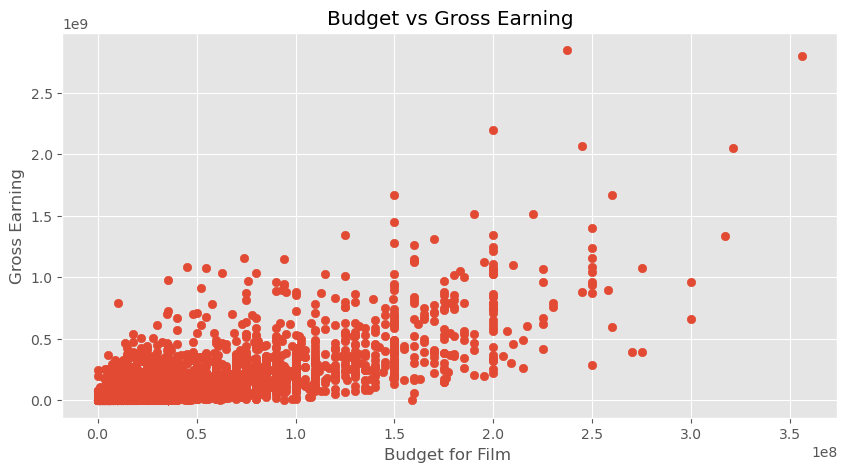

In [227]:
#scatter plot with budget vs gross
plt.scatter(x=df1["budget"],y=df1["gross"])
plt.title("Budget vs Gross Earning")
plt.xlabel("Budget for Film ")
plt.ylabel("Gross Earning")

In [226]:
df1.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

       released  score      votes       director              writer  \
5445 2009-12-18    7.8  1100000.0  James Cameron       James Cameron   
7445 2019-04-26    8.4   903000.0  Anthony Russo  Christopher Markus   
3045 1997-12-19    7.8  1100000.0  James Cameron       James Cameron   
6663 2015-12-18    7.8   876000.0    J.J. Abrams     Lawrence Kasdan   
7244 2018-04-27    8.4   897000.0  Anthony Russo  Christopher Markus   

                   star        country     budget       gross  \
5445    Sam Worthington  United States  237000000  2847246203   
7445  Robert Downey Jr.  United States  356000000  2797501328   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
6663       Daisy Ridley  United States  245000000  2069521700   
7244  Robert Downey Jr.  United States  321000000  2048359754   

                    company  runtime country_release correctyear  
5445  Twentieth Century Fox    162.0   United States        2009  
7445         Marvel Studios    181.0   United States        2019  
3045  Twentieth Century Fox    194.0   United States        1997  
6663              Lucasfilm    138.0   United States        2015  
7244         Marvel Studios    149.0   United States        2018

<Axes: xlabel='budget', ylabel='gross'>

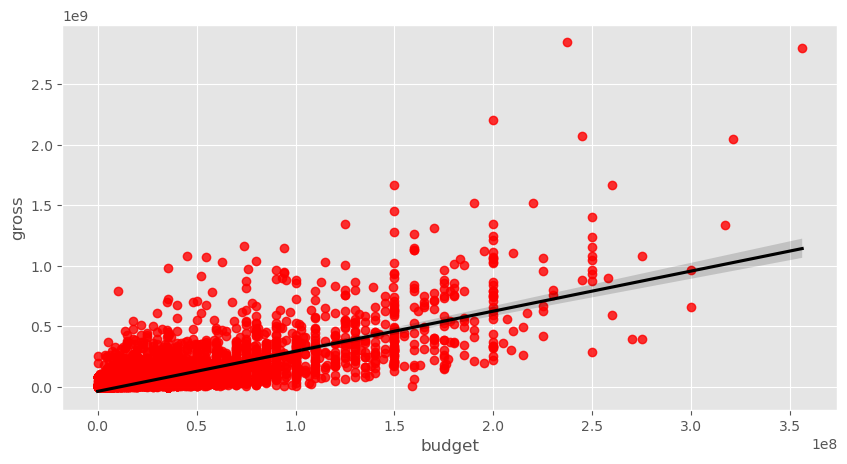

In [236]:
# plot regplot gross vs budget
sns.regplot(x="budget",y="gross",data=df1,scatter_kws={"color":"red"},line_kws={"color":"black"})

In [249]:
df1[["budget","gross","score","votes","runtime"]].corr(method="pearson") # method pearson ,spearman ,reddell

budget     gross     score     votes   runtime
budget   1.000000  0.711270  0.064554  0.421090  0.265305
gross    0.711270  1.000000  0.182868  0.628713  0.241336
score    0.064554  0.182868  1.000000  0.409182  0.399451
votes    0.421090  0.628713  0.409182  1.000000  0.309212
runtime  0.265305  0.241336  0.399451  0.309212  1.000000

In [250]:
# high correlation between  budget vs gross and gross and votes

In [248]:
correlation_matric=df1[["budget","gross","score","votes","runtime"]].corr(method="pearson") # method pearson ,spearman ,reddell

Text(95.72222222222221, 0.5, 'Movie Features')

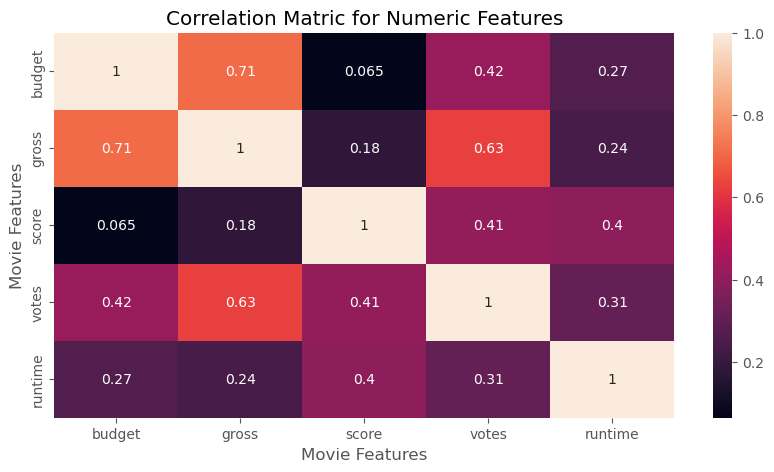

In [246]:
sns.heatmap(correlation_matric,annot=True)
plt.title("Correlation Matric for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel('Movie Features')


In [252]:
#look at company
df1.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

       released  score      votes       director              writer  \
5445 2009-12-18    7.8  1100000.0  James Cameron       James Cameron   
7445 2019-04-26    8.4   903000.0  Anthony Russo  Christopher Markus   
3045 1997-12-19    7.8  1100000.0  James Cameron       James Cameron   
6663 2015-12-18    7.8   876000.0    J.J. Abrams     Lawrence Kasdan   
7244 2018-04-27    8.4   897000.0  Anthony Russo  Christopher Markus   

                   star        country     budget       gross  \
5445    Sam Worthington  United States  237000000  2847246203   
7445  Robert Downey Jr.  United States  356000000  2797501328   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
6663       Daisy Ridley  United States  245000000  2069521700   
7244  Robert Downey Jr.  United States  321000000  2048359754   

                    company  runtime country_release correctyear  
5445  Twentieth Century Fox    162.0   United States        2009  
7445         Marvel Studios    181.0   United States        2019  
3045  Twentieth Century Fox    194.0   United States        1997  
6663              Lucasfilm    138.0   United States        2015  
7244         Marvel Studios    149.0   United States        2018

In [259]:

# convert the  object into numeric values
df_numerize=df1
for col_name in df_numerize.columns:
    if (df_numerize[col_name].dtype=="object"):
        df_numerize[col_name]=df_numerize[col_name].astype("category")
        df_numerize[col_name]=df_numerize[col_name].cat.codes
        
        
         
            
            
            

In [255]:
df_numerize

name  rating  genre  year   released  score      votes  director  \
5445   533       5      0  2009 2009-12-18    7.8  1100000.0      1155   
7445   535       5      0  2019 2019-04-26    8.4   903000.0       162   
3045  6896       5      6  1997 1997-12-19    7.8  1100000.0      1155   
6663  5144       5      0  2015 2015-12-18    7.8   876000.0      1125   
7244   536       5      0  2018 2018-04-27    8.4   897000.0       162   
7480  6194       4      2  2019 2019-07-19    6.9   222000.0      1455   
6653  2969       5      0  2015 2015-06-12    7.0   593000.0       517   
6043  5502       5      0  2012 2012-05-04    8.0  1300000.0      1517   
6646  2145       5      0  2015 2015-04-03    7.1   370000.0      1189   
7494  2131       4      2  2019 2019-11-22    6.8   148000.0       432   
6644   534       5      0  2015 2015-05-01    7.3   777000.0      1517   
7247   791       5      0  2018 2018-02-16    7.3   661000.0      2457   
5845  2407       5      1  2011 2011-07-15    8.1   790000.0       679   
7075  5145       5      0  2017 2017-12-15    7.0   581000.0      2282   
7271  2970       5      0  2018 2018-06-22    6.2   277000.0      1121   
6262  2130       4      2  2013 2013-11-27    7.4   585000.0       432   
7072   657       4      7  2017 2017-03-17    7.1   283000.0       250   
7281  2760       4      2  2018 2018-06-15    7.6   263000.0       303   
7055  5833       5      0  2017 2017-04-14    6.6   214000.0       835   
6244  2823       5      0  2013 2013-05-03    7.1   779000.0      2543   
6688  3622       4      2  2015 2015-07-10    6.4   218000.0      1639   
6846  1056       5      0  2016 2016-05-06    7.8   694000.0       162   
7250   474       5      0  2018 2018-12-21    6.9   404000.0      1189   
4245  6221       5      0  2003 2003-12-17    8.9  1700000.0      2193   
7458  5084       5      0  2019 2019-07-02    7.5   359000.0      1463   
7456  1061       5      0  2019 2019-03-08    6.8   478000.0       147   
5878  6968       5      0  2011 2011-06-29    6.2   390000.0      1886   
6059  4951       5      0  2012 2012-11-09    7.7   642000.0      2476   
6494  6967       5      0  2014 2014-06-27    5.6   302000.0      1886   
2448  6194       1      2  1994 1994-06-24    8.5   970000.0      2415   
6047  5726       5      0  2012 2012-07-20    8.4  1600000.0       483   
7463  5141       5      0  2019 2019-12-20    6.5   394000.0      1125   
7450  2930       6      5  2019 2019-10-04    8.4  1000000.0      2767   
7488  6949       1      2  2019 2019-06-21    7.7   217000.0      1509   
5685  6948       1      2  2010 2010-06-18    8.2   776000.0      1678   
4852  4258       5      0  2006 2006-07-07    7.3   668000.0       996   
6869  4616       5      0  2016 2016-12-16    7.8   572000.0       912   
7481   290       4      1  2019 2019-05-24    6.9   239000.0      1031   
5860  4261       5      0  2011 2011-05-20    6.6   492000.0      2341   
7140  1552       4      2  2017 2017-06-30    6.3   119000.0      1639   
2245  2967       5      0  1993 1993-06-11    8.1   894000.0      2660   
6908  1978       4      2  2016 2016-06-17    7.3   250000.0       124   
3451  5138       4      0  1999 1999-05-19    6.5   748000.0       963   
5667   300       4      1  2010 2010-03-05    6.4   392000.0      2745   
6863  7504       4      2  2016 2016-03-04    8.0   450000.0       362   
6045  6001       5      1  2012 2012-12-14    7.8   773000.0      2193   
3843  2412       4      1  2001 2001-11-16    7.6   685000.0       435   
5243  5725       5      0  2008 2008-07-18    9.0  2400000.0       483   
5652  2406       5      1  2010 2010-11-19    7.7   495000.0       679   
6311  1551       4      2  2013 2013-07-03    7.3   377000.0      2237   
6905  6108       4      1  2016 2016-04-15    7.4   264000.0      1455   
7051  2956       5      0  2017 2017-12-20    6.9   336000.0      1143   
6455  6002       5      1  2014 2014-12-17    7.4   487000.0      2193   
5060  4260

In [258]:
df1.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

       released  score      votes       director              writer  \
5445 2009-12-18    7.8  1100000.0  James Cameron       James Cameron   
7445 2019-04-26    8.4   903000.0  Anthony Russo  Christopher Markus   
3045 1997-12-19    7.8  1100000.0  James Cameron       James Cameron   
6663 2015-12-18    7.8   876000.0    J.J. Abrams     Lawrence Kasdan   
7244 2018-04-27    8.4   897000.0  Anthony Russo  Christopher Markus   

                   star        country     budget       gross  \
5445    Sam Worthington  United States  237000000  2847246203   
7445  Robert Downey Jr.  United States  356000000  2797501328   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
6663       Daisy Ridley  United States  245000000  2069521700   
7244  Robert Downey Jr.  United States  321000000  2048359754   

                    company  runtime country_release correctyear  
5445  Twentieth Century Fox    162.0   United States        2009  
7445         Marvel Studios    181.0   United States        2019  
3045  Twentieth Century Fox    194.0   United States        1997  
6663              Lucasfilm    138.0   United States        2015  
7244         Marvel Studios    149.0   United States        2018

In [269]:
correlaton_mat=df_numerize.corr()

Text(120.58159722222221, 0.5, 'Movie Features')

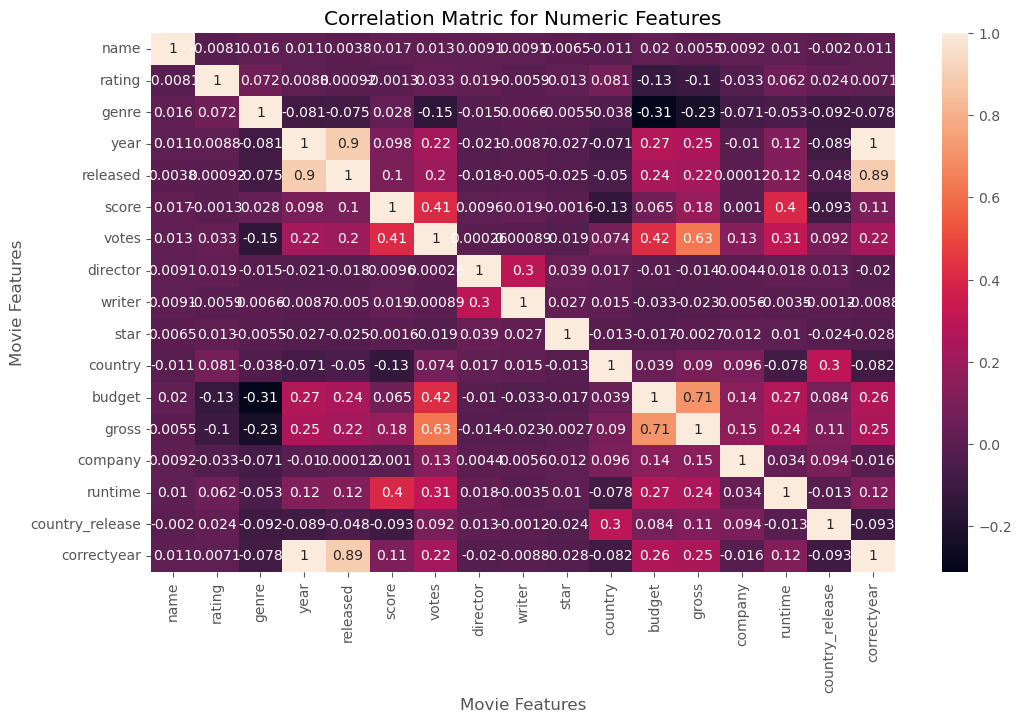

In [270]:
sns.heatmap(correlaton_mat,annot=True)
plt.title("Correlation Matric for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel('Movie Features')


In [279]:
correlation_paires=correlaton_mat.unstack()
correlation_paires

name             name               1.000000
                 rating            -0.008069
                 genre              0.016355
                 year               0.011453
                 released           0.003816
                 score              0.017097
                 votes              0.013088
                 director           0.009079
                 writer             0.009081
                 star               0.006472
                 country           -0.010737
                 budget             0.020368
                 gross              0.005466
                 company            0.009211
                 runtime            0.010392
                 country_release   -0.001968
                 correctyear        0.011134
rating           name              -0.008069
                 rating             1.000000
                 genre              0.072423
                 year               0.008779
                 released           0.000915
          

In [282]:
sorted_paires=correlation_paires.sort_values(ascending=False)
sorted_paires


name             name               1.000000
rating           rating             1.000000
country_release  country_release    1.000000
runtime          runtime            1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
released         released           1.000000
year             year               1.000000
genre            genre              1.000000
writer           writer             1.000000
correctyear      correctyear        1.000000
                 year               0.997295
year             correctyear        0.997295
                 released           0.897431
released         year               0.897431
                 correctyear        0.892556
correctyea

In [278]:
correlation_paires[correlation_paires>.5]

name             name               1.000000
rating           rating             1.000000
genre            genre              1.000000
year             year               1.000000
                 released           0.897431
                 correctyear        0.997295
released         year               0.897431
                 released           1.000000
                 correctyear        0.892556
score            score              1.000000
votes            votes              1.000000
                 gross              0.628713
director         director           1.000000
writer           writer             1.000000
star             star               1.000000
country          country            1.000000
budget           budget             1.000000
                 gross              0.711270
gross            votes              0.628713
                 budget             0.711270
                 gross              1.000000
company          company            1.000000
runtime   

In [283]:
# votes and  the budget have highest correlation to gross earning
# company has no correlation with gross earning